In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from random import randrange

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [2]:
def read_image_data():
	print('Reading image data ...')
	train_x = np.load('../../Data/data_train.npy')
	train_y = np.load('../../Data/train_labels.npy')
	test_x = np.load('../../Data/data_test.npy')

	return (train_x, train_y, test_x)

In [3]:
train_x, train_y, test_x = read_image_data()

Reading image data ...


In [4]:
train_x = train_x.reshape(len(train_x), 32,32,3)

In [5]:
onehot = []
for x in range(len(train_y)):
    if(train_y[x] == 0):
        onehot.append([1,0,0,0])
    elif(train_y[x] == 1):
        onehot.append([0,1,0,0])
    elif(train_y[x] == 2):
        onehot.append([0,0,1,0])
    else:
        onehot.append([0,0,0,1])

In [6]:
onehot = np.array(onehot)
onehot.shape

(20000, 4)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(train_x, onehot, test_size=0.5, shuffle=True)

In [8]:
# Configure the checkpoint :
checkpoint = EarlyStopping(monitor='loss', min_delta=0.00001, patience=15, verbose=1, mode='auto', restore_best_weights=True)
callbacks_list = [checkpoint]

In [13]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', input_shape = (32,32,3)))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (2,2), activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (2,2), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 64)        8256      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 12, 12, 64)        16448     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)         

In [14]:
history = model.fit(train_x, onehot, epochs=2500, batch_size=500, verbose=1,callbacks=callbacks_list)


Epoch 1/2500
20000/20000 [==============================] - 14s 704us/step - loss: 1.3181 - accuracy: 0.3906
Epoch 2/2500
20000/20000 [==============================] - 14s 690us/step - loss: 1.1063 - accuracy: 0.5167
Epoch 3/2500
20000/20000 [==============================] - 14s 696us/step - loss: 1.0305 - accuracy: 0.5618
Epoch 4/2500
20000/20000 [==============================] - 15s 737us/step - loss: 0.9231 - accuracy: 0.6184
Epoch 5/2500
20000/20000 [==============================] - 15s 725us/step - loss: 0.8754 - accuracy: 0.6486
Epoch 6/2500
20000/20000 [==============================] - 15s 736us/step - loss: 0.7716 - accuracy: 0.6941
Epoch 7/2500
20000/20000 [==============================] - 14s 717us/step - loss: 0.7254 - accuracy: 0.7146
Epoch 8/2500
20000/20000 [==============================] - 14s 711us/step - loss: 0.6668 - accuracy: 0.7434
Epoch 9/2500
20000/20000 [==============================] - 14s 691us/step - loss: 0.6245 - accuracy: 0.7610
Epoch 10/2500
2000

20000/20000 [==============================] - 14s 683us/step - loss: 0.0525 - accuracy: 0.9816
Epoch 74/2500
20000/20000 [==============================] - 14s 687us/step - loss: 0.0544 - accuracy: 0.9815
Epoch 75/2500
20000/20000 [==============================] - 14s 681us/step - loss: 0.0517 - accuracy: 0.9816
Epoch 76/2500
20000/20000 [==============================] - 14s 682us/step - loss: 0.0556 - accuracy: 0.9805
Epoch 77/2500
20000/20000 [==============================] - 14s 682us/step - loss: 0.0550 - accuracy: 0.9818
Epoch 78/2500
20000/20000 [==============================] - 14s 682us/step - loss: 0.0522 - accuracy: 0.9818
Epoch 79/2500
20000/20000 [==============================] - 14s 683us/step - loss: 0.0548 - accuracy: 0.9824
Epoch 80/2500
20000/20000 [==============================] - 14s 683us/step - loss: 0.0447 - accuracy: 0.9847
Epoch 81/2500
20000/20000 [==============================] - 14s 683us/step - loss: 0.0585 - accuracy: 0.9797
Epoch 82/2500
20000/2000

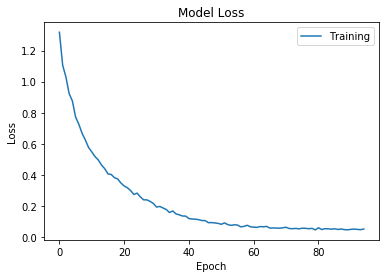

In [15]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

# Training Prediction

In [16]:
predict = model.predict(train_x)

In [17]:
predict.shape

(20000, 4)

In [18]:
submission = []
for i in range(len(predict)):
    submission.append(np.where(predict[i] == np.amax(predict[i]))[0][0])

In [19]:
accuracy_score(train_y,submission)

0.9999

# Testing Prediction and Submission

In [20]:
import csv
def kaggleize(predictions,file):

	if(len(predictions.shape)==1):
		predictions.shape = [predictions.shape[0],1]

	ids = 1 + np.arange(predictions.shape[0])[None].T
	kaggle_predictions = np.hstack((ids,predictions)).astype(int)
	writer = csv.writer(open(file, 'w'))
	writer.writerow(['# id','Prediction'])
	writer.writerows(kaggle_predictions)

In [21]:
test_x = test_x.reshape(len(test_x), 32,32,3)

In [22]:
predict = model.predict(test_x)

In [23]:
submission = []
for i in range(len(predict)):
    submission.append(np.where(predict[i] == np.amax(predict[i]))[0][0])
submission = np.array(submission)
submission.shape

(4000,)

In [24]:
kaggleize(submission,'submission.csv')

# Save Model

In [25]:
model.save('CNN.h5')